In [2]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages


class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [3]:
import os
from langchain.chat_models import init_chat_model

os.environ["OPENAI_API_KEY"] = "sk-ba2dda3817f145d7af141fdf32e31d90"

llm = init_chat_model("openai:qwen-plus-2025-04-28",
                      base_url="https://dashscope.aliyuncs.com/compatible-mode/v1"
                      )

In [4]:
#定义节点chatbot
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)

In [5]:
graph_builder.add_edge(START, "chatbot")

In [6]:
graph = graph_builder.compile()

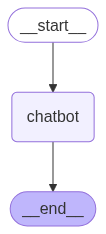

In [7]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        print(event)
        #stream 返回的每个 event 通常是一个字典，键是图中节点的名称，值是该节点完成后的状态更新。
        for value in event.values():
            #消息列表中的最后一条消息的文本内容
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        #退出
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        #调用
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

{'chatbot': {'messages': [AIMessage(content='你好！有什么可以帮助你的吗？😊', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 13, 'total_tokens': 21, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'qwen-plus-2025-04-28', 'system_fingerprint': None, 'id': 'chatcmpl-777bd96e-2846-96e7-b38b-e389b4907cc7', 'service_tier': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--a90d3c12-24c7-434e-9097-7213bcefd1fa-0', usage_metadata={'input_tokens': 13, 'output_tokens': 8, 'total_tokens': 21, 'input_token_details': {}, 'output_token_details': {}})]}}
Assistant: 你好！有什么可以帮助你的吗？😊
Goodbye!
